# Classes Assignment

## Using remotely-sensed NDVI to understand temporal and spatial patterns of grassland brown-down in Boulder County, Colorado

Advyth Ramachandran

Department of Ecology & Evolutionary Biology,
University of Colorado, Boulder

*Class Final Project for Earth Analytics Bootcamp, Fall 2023*

> *Disclaimer:*
>
> *The work in this notebook was generated for a class project, is not reviewed, and all findings should be considered preliminary*.


---
## **Instructions for assignment**

## STEP 1: STUDY OVERVIEW

Your notebook should include an explanation of why and how you create you workflow. INCLUDE a sentance or two about the function/method and class you created, and why you chose it.

### Classes and objects in Python

You can think of an object as a collection of named values and functions that make use of those values. When they are part of an object, we call them **attributes** and **methods**. Each object is created from a **class**, or object template. Examples of classes you have used include the `pandas DataFrame` and `xarray DataArray`. As an example, `xr.DataArray` includes attributes like `.values`, and methods like `.mean()`. It also contains some special attributes created when the function is initialized for each of the coordinates (e.g. `x` and `y` if your `DataArray` has those as coordinates).

You can absolutely write a reproducible scientific workflow without writing any of your own classes. However, there are some situations where custom classes can come in handy. Consider the following examples:
  * Suppose you are writing code to interface with an API. There are going to be multiple steps, such as logging in, searching for data, and downloading data. Throughout the whole interaction, you want to keep track of the dates and bounding box for the data -- and you might even want to access those values after the data are completely downloaded! If you write a function, you'll run into two problems: 1) the function will be very long, 2) the function may take a long time to run, making it challenging to debug and text, and 3) you'll lose all the named values you define inside the function when it finishes running unless you pass them explicitely as return values. Using a class solves all these problems. You can split up the different parts of the workflow into shorter methods that all have access to the same information, such as bounding box or HTTP Session information.
  * Suppose you are assembling a data cube (aligned and harmonized data from heterogeneous sources). Eventually, you will have a single `xarray DataArray` or `Dataset`. However, in the meantime you need to keep track of many data files such that you can access them by name, by attribute, or by order. Often we use the `pandas DataFrame` for this type of thing. However, it would be nice if the `DataFrame` did a couple of things differently. For example, when it prints you would like it to display the bounding box of each DataArray instead of the array itself (which is computationally expensive). Or, maybe when you create the DataFrame you would like it to search for all file names that match a pattern and extract key information. You can accomplish these goals by creating a **child** class to `pandas DataFrame` that inherits all its capabilities and modifies its methods, perhaps adding some new ones.

## **Project Description**

Tracking vegetation phenology – the timing of plant growth and physiological processes – is critical to understanding plant response to drought and identifying areas with plant mortality which can create high fire hazard (Li et al. 2023, Bowman et al. 2020, Gemitzi & Koutsias 2021). Changes in plant phenology can be used to understand plant responses to drought, providing information that is relevant to land managers. In semi-arid and arid climates, the timing of plant green-up after the wet season onset and brown-down after dry season onset can change in response to periodic weather fluctuations and seasonal drought, both of which may be altered by climate change (Swain 2021).

Examining past temporal trends in phenology is the first step to hypothesizing about future changes in vegetation phenology, which is important to understand as climate change may alter vegetation phenology in ways that amplify fire risk. For example, if climatic warming delays the onset of the winter rainy season by extending the summer/fall seasonal dry period, the temporal co-occurrence of extreme wind events and dry fuels which together create the conditions for rapid fire spread upon ignition, can increase (Swain 2021). In Colorado, extreme wind events in the fall and winter, during which grassland vegetation is senesced (dead and dry), have fueled rapid wildfires such as the 2021 Marshall Fire (Fovell, Brewer, and Garmong 2022). In such semi-arid climates, forecasting the timing of vegetation senescence in the fall dry season is crucial to predicting fire risk.

However, plant phenology is spatially variable. While it is widely known that vegetation types differ in the time of senescence (e.g., forest versus grassland), how finer-scale vegetation communities (e.g., shortgrass versus tallgrass prairie) differ in the time of senescence is less clear. In urban and peri-urban areas, understanding when various grassland types senesce in the fall can help identify grassland patches of high fire hazard; that is, patches where the fall brown-down date is earlier, potentially increasing the chance of the co-occurrence of fire weather and dry fuels. In wildland areas where fire risk is less of a management concern, the time of senescence can inform the timing of management interventions to enhance biodiversity such as grazing to remove dominant invasive grass thatch.

Remote sensing can be used to track vegetation phenology over time at larger spatial scales than traditional field-based monitoring. While a variety of remotely-sensed metrics can be used to infer vegetation phenology, NDVI is a commonly used metric that quantifies vegetation greenness (Ren et al. 2018) and is relatively consistent with phenology derived from other methods such as phenological cameras (Richardson et al. 2018). If NDVI is very low at a particular location compared to other NDVI values at that location, we can infer that the vegetation has begun to or has already senesced.

**Questions**

For grassland vegetation in Boulder County, Colorado, I asked:

1.	Can remote sensing data be used to detect vegetation senescence across space and different vegetation community types?
2.	Do distinct vegetation communities (e.g., mixed versus tallgrass versus shortgrass prairie) differ in the timing of vegetation senescence?
3.	Is the timing of vegetation senescence changing over time (possible due to climatic warming)?

## **Site Description**

Boulder County, located in the state of Colorado, U.S.A., sits at an elevation of about 5,400 feet above sea level (Wikipedia Contributors) and contains a variety of vegetation communities ranging from shortgrass prairie and tallgrass prairie to shrublands, montane forest, and alpine areas (City of Boulder 2021).

Below the Rocky Mountain foothills, Boulder County is within the Great Plains region, and has a steppe climate with 10-20 inches of precipitation per year, which occurs year-round, and hot summers (Wikipedia Contributors). Snow falls between October and May. The vegetation in the Great Plains portion of the county is predominantly grassland comprising a mix of grasses and forbs; there are few trees outside of riparian zones (CoNPS n.d.). Plants typically flower from early April through early-to-mid October (CoNPS n.d.).

## **Data Description**

**_NDVI Remote Sensing Data_**

To quantify vegetation brown-down dates, I used data generated by the MODIS (or Moderate Resolution Imaging Spectroradiometer) instrument aboard the Aqua satellite. The U.S. National Aeronautics and Space Administration (NASA) provides a normalized difference vegetation index (NDVI) data product at a 16-day resolution at 250 meter pixel resolution (Didan 2021). The time span of this data ranges from from 2002-2023. The NDVI layer provided by the U.S. National Aeronautics and Space Administration(NASA) is generated using an algorithm that chooses the best available pixel value from all images in the 16 day period, accounting for anomalies and low clouds (Didan 2021).

It is important to note that snow cover and cloud cover can influence NDVI values (Bradley et al. 2007). Future work could re-run this analysis using a curve fitting procedure with smoothing as in Bradley et al. (2007) to address these issues.

**_Vegetation Type Data_**

To test whether NDVI differed among vegetation types, I compared NDVI values to vegetation polygons field-mapped by the City of Boulder Open Space & Mountain Parks Department (OSMP). The Department manages a great variety of ecosystems, mostly in the grasslands and montane forest surrounding the City of Boulder. OSMP has conducted extensive vegetation mapping of land the department manages, categorizing vegetation using the U.S. National Vegetation Classification (USNVC) system which includes several hierarchical categories (City of Boulder 2021). The target level for mapping on OSMP land is the Association level which includes types that are part of the USNVC but also types created by OSMP (City of Boulder 2021). The Association describes dominant species in the vegetation type. The Association are pooled into Macrogroups.

> Data Citations:
>
> Didan, K.. MODIS/Aqua Vegetation Indices 16-Day L3 Global 250m SIN Grid V061. 2021, distributed by NASA EOSDIS Land Processes Distributed Active Archive Center, https://doi.org/10.5067/MODIS/MYD13Q1.061. Accessed 2023-12-18.
> 
> City of Boulder. 2021. OSMP Vegetation (USNVC Alliances). Date updated: November 7, 2023. Date accessed: December 18, 2023. https://open-data.bouldercolorado.gov/datasets/18555477ea2742a19feed47370f98e7b_1/about.

## **Analysis**

In [2]:
# Load libraries
import cartopy.crs as ccrs
import pathlib
import earthpy as et
import earthpy.earthexplorer as etee
import earthpy.appeears as etapp
import pandas as pd
import geopandas as gpd
import geoviews as gv
import holoviews as hv
import hvplot.pandas
import hvplot.xarray
import io
import matplotlib.pyplot as plt
import numpy as np
import os
import param
import panel as pn
import requests
import regionmask
import rioxarray as rxr
import seaborn as sns
import xarray as xr

from glob import glob
from shapely.geometry import box, Polygon

hv.extension('bokeh')
gv.extension("bokeh")

## Download data

In [3]:
# Make data directories

data_dir = os.path.join(et.io.HOME, et.io.DATA_NAME, 'boulder-grasslands')
ndvi_dir = os.path.join(data_dir, 'ndvi-data')
veg_type_dir = os.path.join(data_dir, 'veg-type-data')

ndvi_processed_data_path = os.path.join(ndvi_dir, 'processed_data')

for a_dir in [ndvi_dir, veg_type_dir, ndvi_processed_data_path]:
    if not os.path.exists(a_dir):
        os.makedirs(a_dir)

Download vegetation community type data.

In [4]:
# Download vegetation type data if it has not already been downloaded.

print("Checking if data is downloaded...")
veg_type_path = os.path.join(veg_type_dir, 'veg_type.geojson')

if os.path.exists(veg_type_path):
    print("Data is already downloaded.")
else:
    print("Data is not downloaded. Initiating download...")

    # Define URL
    veg_url = (
        "https://gis.bouldercolorado.gov/ags_svr2/rest/services/osmp/"
        "OSMPVegetation/MapServer/1/query?"
        "where=1%3D1&outFields=*"
        "&returnGeometry=false"
        "&returnIdsOnly=true&outSR=4326&f=json"
    )

    # Mimic web browser
    user_agent = (
        'Mozilla/5.0 (X11; Linux x86_64; rv:60.0) '
        'Gecko/20100101 Firefox/81.0'
    )

    # Download GEOJSON
    r = requests.get(url=veg_url, headers={'User-Agent': user_agent})

    # Read GeoJSON data into a GeoDataFrame
    geojson_data = r.json()

    # Extract the objectIDs (the indexes of the rows in the dataset)
    objectid_list = geojson_data["objectIds"]

    # Define chunks from the row numbers
    chunks = [
        (objectid_list[i],
            objectid_list[min(i + 1000,
                              len(objectid_list)-1)])
        for i in range(0, len(objectid_list), 1000)
    ]
    print("Data chunks identified.")

    # Due to the City of Boulder ArcGIS Hub limit of downloading
    # a maximum of 1,000 items at a time,
    # split the dataset into chunks and download the chunks individually.

    veg_list = []

    # Download data for each chunk
    for (min_objectid, max_objectid) in chunks:

        print("Downloading chunk.")

        # Define url
        veg_url = (
            "https://gis.bouldercolorado.gov/ags_svr2/rest/services/"
            "osmp/OSMPVegetation/MapServer/1/query?"
            "where=OBJECTID%20%3E%3D%20{min_objectid}"
            "%20AND%20OBJECTID%20%3C%3D%20{max_objectid}"
            "&outFields=*&outSR=4326&f=geojson"
        )

        # Mimic web browser
        user_agent = (
            'Mozilla/5.0 (X11; Linux x86_64; rv:60.0) '
            'Gecko/20100101 Firefox/81.0'
        )

        # Download chunk of data
        r = requests.get(url=veg_url.format(
            min_objectid=min_objectid,
            max_objectid=max_objectid),
            headers={'User-Agent': user_agent})

        # Read GeoJSON data into a GeoDataFrame
        geojson_data = r.json()
        veg_chunk_gdf = (gpd.GeoDataFrame
                         .from_features(geojson_data['features'])
        )

        # Add the chunk gdf to the list
        veg_list.append(veg_chunk_gdf)

        print("Done.")

    # Concatenate the chunk gdfs into one gdf
    veg_gdf = pd.concat(veg_list)

    # Save downloaded data to CSV in directory
    veg_gdf.to_file(veg_type_path, driver='GeoJSON')
    print("Saved data to GeoJSON.")

Checking if data is downloaded...
Data is already downloaded.


Download NDVI data.

In [5]:
# Load vegetation data
veg_gdf = gpd.read_file(veg_type_path)

# Calculate the total bounds
bounding_box = veg_gdf.total_bounds

# Create a polygon from the bounding box
minx, miny, maxx, maxy = bounding_box
bounding_box_polygon = box(minx, miny, maxx, maxy)
bounding_box_gdf = gpd.GeoDataFrame(geometry=[bounding_box_polygon],
                                    crs=veg_gdf.crs)

print(bounding_box_gdf)

                                            geometry
0  POLYGON ((-105.10754 39.86615, -105.10754 40.1...


In [6]:
# Initialize AppeearsDownloader for MODIS NDVI data

ndvi_downloader = etapp.AppeearsDownloader(
    download_key="modis-ndvi",
    ea_dir=ndvi_dir,
    product="MYD13Q1.061",  # from list of APPEEARS datasts
    layer="_250m_16_days_NDVI",
    start_date="01-01",
    end_date="12-31",
    recurring=True,
    year_range=[2015, 2022],
    polygon=bounding_box_gdf,
)

# Download files if the download directory does not exist
if os.path.exists(ndvi_downloader.data_dir):
    print("MODIS NDVI data is already downloaded.")
else:
    print("Downloading MODIS NDVI data.")
    ndvi_downloader.download_files()

ndvi_downloader

MODIS NDVI data is already downloaded.


In [7]:
# Merge NDVI arrays into Dataset and cache result

# Define NDVI processed data path
ndvi_combined_path = os.path.join(ndvi_processed_data_path, "ndvi_data.nc")


# Load and merge arrays only if the processed data has not already been created
if os.path.exists(ndvi_combined_path):
    print("NDVI data has already been merged and processed.")
else:
    print("Merging and processing data.")

    # Generate list of data files
    ndvi_path_list = glob(
        os.path.join(ndvi_downloader.data_dir, "*", "*NDVI*.tif")
    )

    # Merge images into a single data array

    doy_start = -19  # the character number of the start of doy in file name
    doy_end = -12  # the character number of the end of doy in file name
    scale_factor = 10000  # from MODIS data documentation

    # Define a list
    ndvi_da_list = []

    # For every file (.tif image), add it to the list
    for ndvi_path in ndvi_path_list:
        # Get date from file name
        doy = ndvi_path[doy_start:doy_end]

        # Define the date variable as the doy in file name
        date = pd.to_datetime(doy, format='%Y%j')

        # Open dataset
        da = rxr.open_rasterio(ndvi_path,
                               # masked=True changes specific excluded
                               # values from the metadata to NaN values
                               masked=True).squeeze()

        # Prepare to concatenate: Add date dimension and clean up metadata
        da = da.assign_coords({'date': date})
        da = da.expand_dims({'date': 1})
        da.name = 'NDVI'

        # Divide by scale factor (see data citation for details)
        da = da / scale_factor

        # Add the DataArray to the end of the accumulator list
        ndvi_da_list.append(da)
        print("Added .tif data to data array list.")

    # Stack arrays into time series
    ndvi_dataset = xr.combine_by_coords(ndvi_da_list, coords=["date"])
    print("Stacked arrays into data set.")

    # Cache the ndvi dataset as a netCDF
    ndvi_dataset.to_netcdf(path=ndvi_combined_path)
    print("Created netCDF file.")

NDVI data has already been merged and processed.


## Load and explore data

<Axes: >

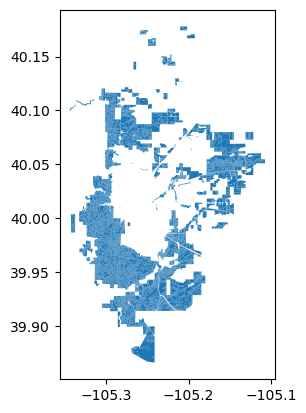

In [7]:
# View vegetation data
veg_gdf

# Test plot: vegetation polygons
veg_gdf.plot()

(array([  5548., 133180., 103449., 632070., 749540., 666482., 628412.,
        255148.,  28441.,   1155.]),
 array([-0.2       , -0.08016001,  0.03967999,  0.15951999,  0.27936   ,
         0.39919999,  0.51903999,  0.63887995,  0.75871998,  0.87855995,
         0.99839997]),
 <BarContainer object of 10 artists>)

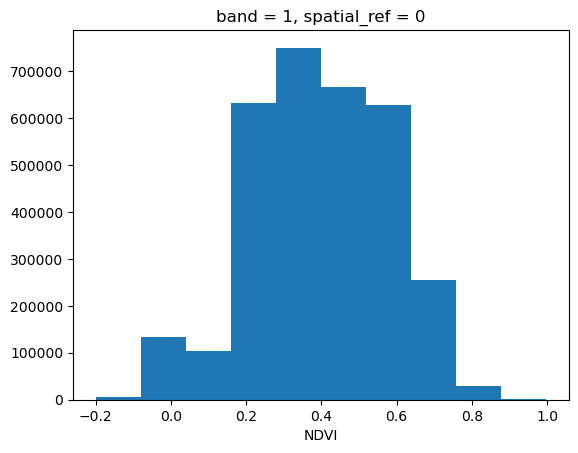

In [8]:
# Load NDVI data
ndvi_ds = xr.open_dataset(ndvi_combined_path)
ndvi_ds

# Generate histogram of NDVI
ndvi_ds.NDVI.plot()

NDVI [should take values between -1.0 and 1.0.](https://ipad.fas.usda.gov/cropexplorer/Definitions/spotveg.htm) Verify that NDVI falls within expected values.

<Axes: title={'center': 'band = 1, spatial_ref = 0'}, xlabel='x', ylabel='y'>

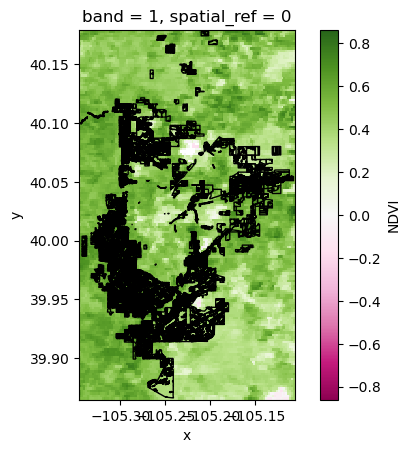

In [9]:
# Test plot: Plot NDVI in 2022

# Select NDVI in 2022 June
ndvi_2022_da = (ndvi_ds
                .sel(date='2022-06')
                .mean('date')
                .NDVI)

# Plot with matplotlib
ndvi_2022_da.plot(cmap=plt.colormaps['PiYG'])
veg_gdf.plot(facecolor='none', ax=plt.gca())

### Visualize NDVI patterns over time

In [10]:
ndvi_time = gv.Dataset(ndvi_ds, kdims=['x', 'y', 'date'], vdims=['NDVI'])

ndvi_plot = ndvi_time.to(gv.Image).opts(
    cmap='greens', colorbar=True, alpha=0.8, tools=['hover'], width=700, height=500)
ndvi_ref_plot = ndvi_plot * gv.tile_sources.OSM()

hv.save(ndvi_ref_plot, 'test_ndvi_over_time.html')

Now, only visualize NDVI within the vegetation polygon boundaries (i.e., ignore all NDVI pixels for which we will not calculate brown-down such as urban and agricultural lands).

In [11]:
# Before clipping, check CRS
print(veg_gdf.crs)
print(ndvi_ds.rio.crs)

# Clip raster to polygons
ndvi_ds_veg_only = ndvi_ds.rio.clip(veg_gdf.geometry, all_touched=True)
print(ndvi_ds_veg_only.rio.crs)

EPSG:4326
EPSG:4326
EPSG:4326


<Axes: title={'center': 'band = 1, spatial_ref = 0'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

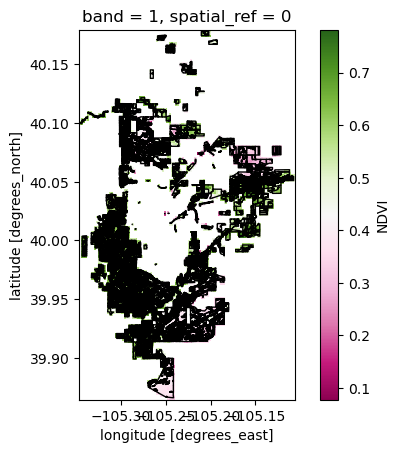

In [12]:
# Plot clipped data

# Calculate NDVI in 2022 June
ndvi_2022_clipped_da = (ndvi_ds_veg_only
                        .sel(date='2022-06')
                        .mean('date')
                        .NDVI)

# Plot with matplotlib
ndvi_2022_clipped_da.plot(cmap=plt.colormaps['PiYG'])
veg_gdf.plot(facecolor='none', ax=plt.gca())

## Calculate brown-down

For each MODIS NDVI pixel, I estimated the brown-down date, which is the day of year for each year where the vegetation is senesced in fall at the end of the summer growing season. In Boulder County, the growing season is spring-summer.

The brown-down date for each pixel was calculated using a percentile threshold as in Marchin et al. (2018) and Browning et al. (2017), as the earliest date (lowest day of year) where the NDVI value is at or below the 10th percentile value for that year. The 10th percentile NDVI was calculated for each year and is relative to the lowest NDVI value within that year, to account for potential differences among years in minimum NDVI values. For the purpose of this preliminary analysis, I was interested in seeing whether brown-down timing was different among years and vegetation types regardless of interannual variation in plant production between years. For example, in a wet year the brown-down represents the day of year where the vegetation was at the 10th percentile "brownest" in comparison to its distribution of NDVI for that year, while in a dry year the brown-down represents the day where the vegetation was 10th percentile brownest for that year's distribution of NDVI. The brown-down date, therefore, may correspond to different values of 10th percentile NDVI for each year, for the same location.

It should be noted that other methods to extract phenology from NDVI exist and may be more accurate, such as procedures to fit NDVI curves using a double-logistic function (Bradley et al. 2007, Ren et al. 2018). Further work could re-run the analysis applying such methods to calculate brown-down.

In [13]:
ndvi_ds

<xarray.Dataset>
Dimensions:      (x: 115, y: 151, date: 185)
Coordinates:
    band         int64 ...
  * x            (x) float64 -105.3 -105.3 -105.3 ... -105.1 -105.1 -105.1
  * y            (y) float64 40.18 40.18 40.17 40.17 ... 39.87 39.87 39.87 39.87
    spatial_ref  int64 ...
  * date         (date) datetime64[ns] 2014-12-27 2015-01-09 ... 2022-12-27
Data variables:
    NDVI         (date, y, x) float32 ...

### **Write custom class to calculate brown-down dates based on percentiles**

Because there is not a method to find the 10th percentile value per year for every x,y in a DataSet, I wrote a custom class and method to do this. The advantage of this approach is that it keeps track of information in the DataSet and reduces the amount of code required. I also wrote a method to take calculate the brown-down date for each pixel across all years of data.

In [46]:
class NDVIDataSet(xr.Dataset):

    """
    A class for NDVI data that allows brown-down dates to be calculated. This
    class requires a dataset with x, y, and date as coordinates and NDVI as a
    data variable.
    
    """
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        # Check if required coordinates are present
        required_coords = {'x', 'y', 'date'}
        if not required_coords.issubset(self.coords):
            missing_coords = required_coords - set(self.coords)
            raise ValueError(f"This class requires the DataSet to have coordinates: {', '.join(missing_coords)}. Please ensure the input class has coordinates of x, y, and date.")


    def calculate_annual_brown_down_dates(self, month_start, month_end, percentile):
        """
        Calculate the earliest date that the NDVI values are at or 
        below the nth percentile of NDVI for that year, for each pixel.

        Parameters:
        - percentile
            The percentile (decimal 0-1) cut-off for what constitutes "brown-down."

        - month_start
            The starting month (number 1-12) for the timeframe in 
            which to calculate brown-down.

        - month_end
            The ending month (number 1-12) for the timeframe in 
            which to calculate brown-down. If the whole year is the desired,
            timeframe, select 1 as month_start and 12 as month_end

        Returns:
        - xr.DataArray
            An xarray DataArray containing the calculated brown-down dates.
        """

        # Calculate percentile thresholds
        thresholds_df = (self.to_dataframe()
                 .reset_index()
                 # Filter to the time window of interest
                 .loc[lambda x: (x['date'].dt.month >= month_start) & (x['date'].dt.month <= month_end)]
                 # Convert the data coordinate to column
                 .assign(year=lambda x: x['date'].dt.year)
                 # Calculate 10th percentile value
                 .groupby(['x', 'y', 'year'])
                 .agg(threshold=('NDVI', lambda x: x.quantile(percentile)))
                 )
  
        # Identify the nth percentile dates of greenness
        dates_da = (self.to_dataframe()
            .reset_index()
            # Filter to the time window of interest
            .loc[lambda x: (x['date'].dt.month >= month_start) 
                 & (x['date'].dt.month <= month_end)]
            # Convert the data coordinate to column
            .assign(year=lambda x: x['date'].dt.year)
            # Left-join the thresholds by columns x, y, year
            .merge(thresholds_df, on=['x', 'y', 'year'], how='left')
            # Create a new column for TF the ndvi value falls at
            # or under the threshold
            .assign(is_below_threshold=lambda x: x['NDVI'] <= x['threshold'])
            # Remove all False columns
            .loc[lambda x: x['is_below_threshold']]
            # Group by x, y, year, select lowest dates
            .groupby(['x', 'y', 'year'])
            .agg(brown_down_date=('date', 'min'))
            .to_xarray()
            )

        # Create day of year from date column
        dates_da['brown_down_doy'] = dates_da.brown_down_date.dt.dayofyear
        
        # Add a CRS back in
        dates_da = dates_da.rio.write_crs(self.rio.crs)
        
        return dates_da

I also wrote error handling for this class in case it is used in the future for another DataSet.

In [86]:
# Test the error handling of this class

# Create a sample DataSet without the 'date' coordinate
missing_date_coords = {'x': np.arange(10), 'y': np.arange(10)}
missing_date_data = np.random.rand(20, 10, 10)
missing_date_dataset = xr.Dataset({'NDVI': (('date', 'y', 'x'), missing_date_data)}, coords=missing_date_coords)

display(missing_date_dataset)

# Test if creating NDVIDataSet with the missing 'date' coordinate raises an error
try:
    test_dataset = NDVIDataSet(missing_date_dataset)
    print("Test passed.")
except ValueError as e:
    print(f"Test failed: Error raised as expected - {e}")

<xarray.Dataset>
Dimensions:  (date: 20, y: 10, x: 10)
Coordinates:
  * x        (x) int64 0 1 2 3 4 5 6 7 8 9
  * y        (y) int64 0 1 2 3 4 5 6 7 8 9
Dimensions without coordinates: date
Data variables:
    NDVI     (date, y, x) float64 0.08183 0.1435 0.6866 ... 0.2727 0.4926 0.4652

Test failed: Error raised as expected - This class requires the DataSet to have coordinates: date. Please ensure the input class has coordinates of x, y, and date.


#### **Calculate annual brown-down dates for each pixel**

In [87]:
display(ndvi_ds)
ndvi_data = NDVIDataSet(ndvi_ds)

<xarray.Dataset>
Dimensions:      (x: 115, y: 151, date: 185)
Coordinates:
    band         int64 ...
  * x            (x) float64 -105.3 -105.3 -105.3 ... -105.1 -105.1 -105.1
  * y            (y) float64 40.18 40.18 40.17 40.17 ... 39.87 39.87 39.87 39.87
    spatial_ref  int64 ...
  * date         (date) datetime64[ns] 2014-12-27 2015-01-09 ... 2022-12-27
Data variables:
    NDVI         (date, y, x) float32 ...

In [88]:
annual_brown_down_ds = ndvi_data.calculate_annual_brown_down_dates(percentile = 0.1, month_start = 6, month_end = 10)

display(annual_brown_down_ds)

<xarray.Dataset>
Dimensions:          (x: 115, y: 151, year: 8)
Coordinates:
  * x                (x) float64 -105.3 -105.3 -105.3 ... -105.1 -105.1 -105.1
  * y                (y) float64 39.87 39.87 39.87 39.87 ... 40.17 40.18 40.18
  * year             (year) int32 2015 2016 2017 2018 2019 2020 2021 2022
    spatial_ref      int64 0
Data variables:
    brown_down_date  (x, y, year) datetime64[ns] 2015-10-24 ... 2022-10-24
    brown_down_doy   (x, y, year) float64 297.0 281.0 249.0 ... 297.0 297.0

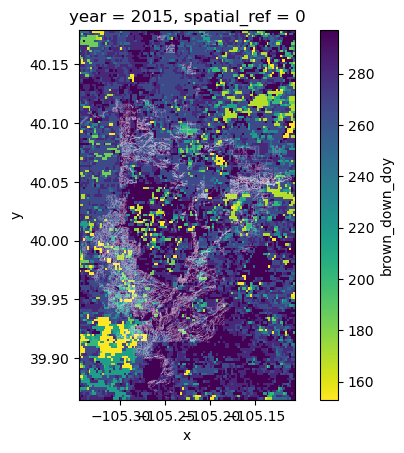

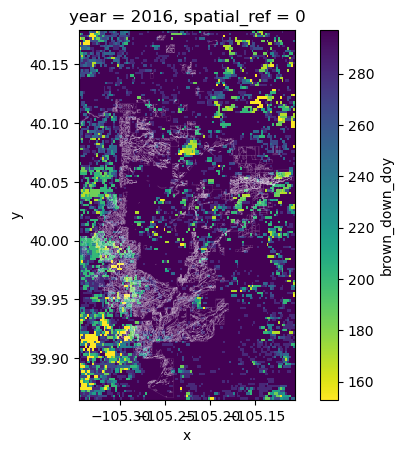

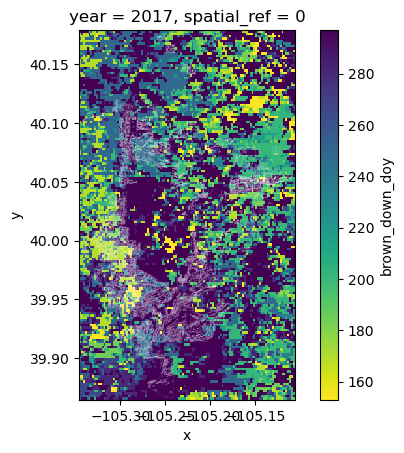

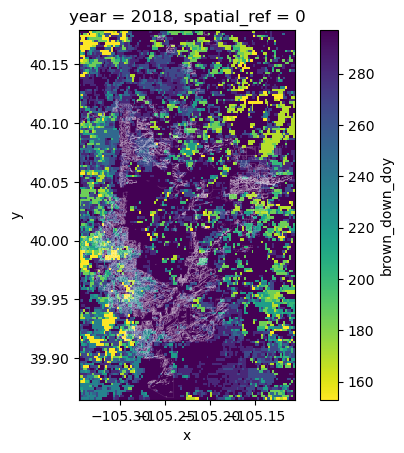

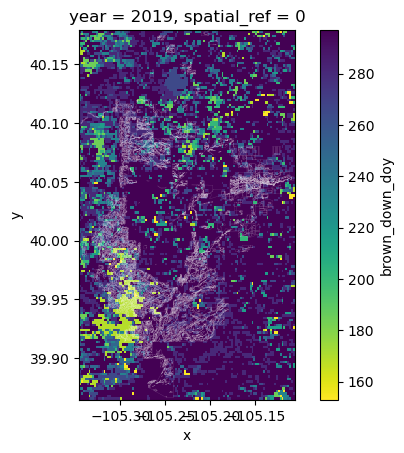

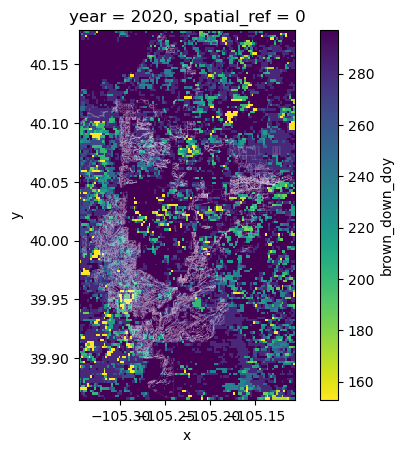

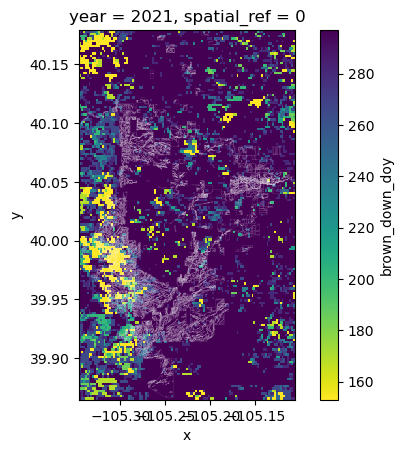

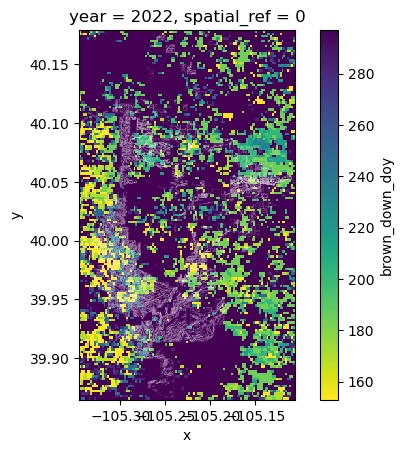

In [61]:
# Test plot to verify dates were calculated

years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
for a_year in years:
    dates_year_da = (annual_brown_down_ds
                     .sel(year=a_year)
                     .brown_down_doy)

    # Plot with matplotlib
    dates_year_da.plot(x='x', y='y', cmap=plt.colormaps['viridis_r'])
    veg_gdf.plot(facecolor='none', edgecolor='white', linewidth=0.1, alpha=0.5, ax=plt.gca())

    plt.show()

### **Analyze annual brown-down dates for vegetation patches**

Calculate zonal mean brown-down date for each vegetation patch (polygon).

In [65]:
display(annual_brown_down_ds)

<xarray.Dataset>
Dimensions:          (x: 115, y: 151, year: 8)
Coordinates:
  * x                (x) float64 -105.3 -105.3 -105.3 ... -105.1 -105.1 -105.1
  * y                (y) float64 39.87 39.87 39.87 39.87 ... 40.17 40.18 40.18
  * year             (year) int32 2015 2016 2017 2018 2019 2020 2021 2022
    spatial_ref      int64 0
Data variables:
    brown_down_date  (x, y, year) datetime64[ns] 2015-10-24 ... 2022-10-24
    brown_down_doy   (x, y, year) float64 297.0 281.0 249.0 ... 297.0 297.0

In [66]:
# Select only day of year
dates_array = annual_brown_down_ds['brown_down_doy']

# Create mask of multiple regions from shapefile
veg_mask = regionmask.mask_3D_geopandas(
    veg_gdf,
    dates_array.x,
    dates_array.y,
    drop=True,
    overlap=True,
    numbers="OBJECTID"
)

# Apply mask on dates data
dates_array = dates_array.where(veg_mask)

# Calculate means by veg polygon and year
veg_avg_doy_ds = (dates_array
                    .groupby("region")
                    .mean(["x", "y"], skipna=True)
                    )

# Convert to dataframe
veg_avg_doy_df = (veg_avg_doy_ds.to_dataframe()
                    .apply(lambda x: x.dropna())
                    .sort_values(by=['region', 'year'])
                    )

veg_avg_doy_df

,,spatial_ref,brown_down_doy
year,region,,
2015,10448,0,265.0
2016,10448,0,297.0
2017,10448,0,297.0
2018,10448,0,297.0
2019,10448,0,281.0
...,...,...,...
2018,20748,0,297.0
2019,20748,0,281.0
2020,20748,0,297.0


In [67]:
veg_avg_doy_df.index
veg_avg_doy_df.dtypes

spatial_ref         int64
brown_down_doy    float64
dtype: object

In [71]:
veg_avg_dates_df = veg_avg_doy_df.copy()

# Assuming 'day_of_year' is a column, not part of the MultiIndex
veg_avg_dates_df['brown_down_doy'] = veg_avg_dates_df['brown_down_doy'].astype(int).apply(lambda x: f'{x:03d}')

# Assuming 'year' is part of a MultiIndex
veg_avg_dates_df = veg_avg_dates_df.reset_index()  # Reset the entire MultiIndex
veg_avg_dates_df['brown_down_doy'] = pd.to_datetime(veg_avg_dates_df['year'].astype(str) + veg_avg_dates_df['brown_down_doy'], format='%Y%j')

type(veg_avg_dates_df)
veg_avg_dates_df

,year,region,spatial_ref,brown_down_doy
0,2015,10448,0,2015-09-22
1,2016,10448,0,2016-10-23
2,2017,10448,0,2017-10-24
3,2018,10448,0,2018-10-24
4,2019,10448,0,2019-10-08
...,...,...,...,...
16899,2018,20748,0,2018-10-24
16900,2019,20748,0,2019-10-08
16901,2020,20748,0,2020-10-23
16902,2021,20748,0,2021-10-24


In [75]:
# Merge average dates by vegetation patch
# with original vegetation to retrieve geometry
veg_avg_dates_gdf = (veg_avg_dates_df
                     .reset_index()
                     .merge(veg_gdf, left_on='region',
                            right_on='OBJECTID',
                            how='left')
                     .sort_values(by=['region', 'year'])

                     # Convert to gdf
                     .pipe(gpd.GeoDataFrame, geometry='geometry')
                     )

# Remove rows with NaN values for plotting
veg_avg_dates_gdf = (veg_avg_dates_gdf
                     .loc[veg_avg_dates_gdf['brown_down_doy']
                          .notna()]
                     )

print(type(veg_avg_dates_gdf))
veg_avg_dates_gdf

<class 'geopandas.geodataframe.GeoDataFrame'>


,index,year,region,spatial_ref,brown_down_doy,OBJECTID,USNVCKEY,SCIENTIFICNAME,COLLOQUIALNAME,MACROGROUP,SUBCLASS,CONSTARGET,WETLAND,ACRES,URL,GlobalID,Shape.STArea(),Shape.STLength(),geometry
0,0,2015,10448,0,2015-09-22,10448,CEGL001651,Achnatherum hymenoides Shale Barren Grassland,None,Great Basin-Intermountain Dry Shrubland & Gras...,Cool Semi-Desert Scrub & Grassland,Mixedgrass Prairie Mosaic,None,1.059736,https://explorer.natureserve.org/Taxon/ELEMENT...,{CB5F0607-14AF-45B7-BA69-03616BD82351},46161.924356,1217.040849,"POLYGON ((-105.28852 40.08049, -105.28856 40.0..."
1,1,2016,10448,0,2016-10-23,10448,CEGL001651,Achnatherum hymenoides Shale Barren Grassland,None,Great Basin-Intermountain Dry Shrubland & Gras...,Cool Semi-Desert Scrub & Grassland,Mixedgrass Prairie Mosaic,None,1.059736,https://explorer.natureserve.org/Taxon/ELEMENT...,{CB5F0607-14AF-45B7-BA69-03616BD82351},46161.924356,1217.040849,"POLYGON ((-105.28852 40.08049, -105.28856 40.0..."
2,2,2017,10448,0,2017-10-24,10448,CEGL001651,Achnatherum hymenoides Shale Barren Grassland,None,Great Basin-Intermountain Dry Shrubland & Gras...,Cool Semi-Desert Scrub & Grassland,Mixedgrass Prairie Mosaic,None,1.059736,https://explorer.natureserve.org/Taxon/ELEMENT...,{CB5F0607-14AF-45B7-BA69-03616BD82351},46161.924356,1217.040849,"POLYGON ((-105.28852 40.08049, -105.28856 40.0..."
3,3,2018,10448,0,2018-10-24,10448,CEGL001651,Achnatherum hymenoides Shale Barren Grassland,None,Great Basin-Intermountain Dry Shrubland & Gras...,Cool Semi-Desert Scrub & Grassland,Mixedgrass Prairie Mosaic,None,1.059736,https://explorer.natureserve.org/Taxon/ELEMENT...,{CB5F0607-14AF-45B7-BA69-03616BD82351},46161.924356,1217.040849,"POLYGON ((-105.28852 40.08049, -105.28856 40.0..."
4,4,2019,10448,0,2019-10-08,10448,CEGL001651,Achnatherum hymenoides Shale Barren Grassland,None,Great Basin-Intermountain Dry Shrubland & Gras...,Cool Semi-Desert Scrub & Grassland,Mixedgrass Prairie Mosaic,None,1.059736,https://explorer.natureserve.org/Taxon/ELEMENT...,{CB5F0607-14AF-45B7-BA69-03616BD82351},46161.924356,1217.040849,"POLYGON ((-105.28852 40.08049, -105.28856 40.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16899,16899,2018,20748,0,2018-10-24,20748,None,None,None,None,None,None,None,9.648047,None,{7AE3C8CA-CA41-43DE-B3A6-0AA47F2E73A6},420267.240374,3053.227629,"POLYGON ((-105.22225 39.99893, -105.22225 39.9..."
16900,16900,2019,20748,0,2019-10-08,20748,None,None,None,None,None,None,None,9.648047,None,{7AE3C8CA-CA41-43DE-B3A6-0AA47F2E73A6},420267.240374,3053.227629,"POLYGON ((-105.22225 39.99893, -105.22225 39.9..."
16901,16901,2020,20748,0,2020-10-23,20748,None,None,None,None,None,None,None,9.648047,None,{7AE3C8CA-CA41-43DE-B3A6-0AA47F2E73A6},420267.240374,3053.227629,"POLYGON ((-105.22225 39.99893, -105.22225 39.9..."
16902,16902,2021,20748,0,2021-10-24,20748,None,None,None,None,None,None,None,9.648047,None,{7AE3C8CA-CA41-43DE-B3A6-0AA47F2E73A6},420267.240374,3053.227629,"POLYGON ((-105.22225 39.99893, -105.22225 39.9..."


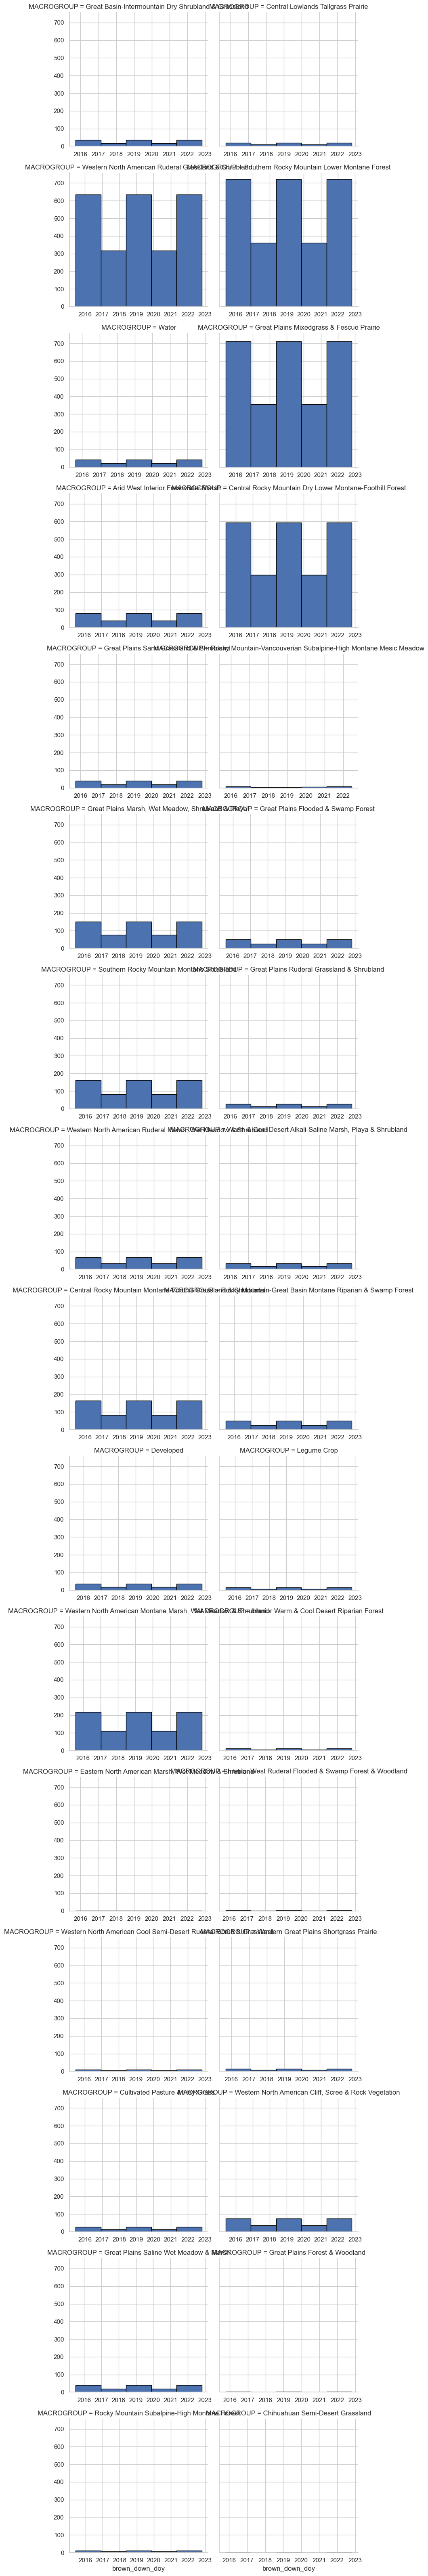

In [76]:
# Create a faceted histogram to see brown-down date distributions
# for each macrogroup.

sns.set(style="whitegrid") 
g = sns.FacetGrid(veg_avg_dates_gdf, col="MACROGROUP",
                  col_wrap=2, height=4, sharex=False)

# Map the histogram to each facet
g.map(plt.hist, "brown_down_doy", bins=5, edgecolor='black')

plt.show()

## **Results**

### Fig 1. Brown-down dates of vegetation patches vary among grasslands compared to forests, and within grassland types.

This chloropleth plot of vegetation patches in 2021 shows that in the western part of the region, the 10th percentile brownest day of year (a proxy for the vegetation "brown-down" or senescence) was in June for most montane forest vegetation patches, but for most grassland vegetation patches, it was in December. The highly destructive Marshall Fire, which occurred on December 30, 2021 in grasslands south of Boulder (Fovell et al. 2022), in the southern portion of the below map, burned weeks after the vegetation browned-down in December.

In [78]:
# Set geometry
veg_avg_dates_gdf = veg_avg_dates_gdf.set_geometry('geometry')

veg_avg_dates_2021_gdf = veg_avg_dates_gdf[veg_avg_dates_gdf['year'] == 2021]
veg_avg_dates_2021_gdf['SCIENTIFICNAME'] = veg_avg_dates_2021_gdf['SCIENTIFICNAME'].astype(str)

browndown_2021_plot = veg_avg_dates_2021_gdf.hvplot.polygons(
    geo=True,
    c='day_of_year',
    cmap='viridis',
    project=True,
    hover_cols=['SCIENTIFICNAME', 'date_of_browndown']
).opts(
    frame_width=600,
    frame_height=400,
    title='Vegetation brown-down in 2021',
    framewise=True,  # Enable the time slider
)

# Show the plot
browndown_2021_by_veg_patch_plot = browndown_2021_plot * gv.tile_sources.EsriImagery

hv.save(browndown_2021_by_veg_patch_plot, 'browndown_2021_by_veg_patch.html')

/Users/advythramachandran/miniconda3/envs/earth-analytics-python/lib/python3.10/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : hatch_color='day_of_year' [no close matches] {renderer: GlyphRenderer(id='p1071', ...)}


## **References**




CoNPS. n.d. “Plains Plants and Habitats.” Colorado Native Plant Society. Accessed December 18, 2023. https://conps.org/home-2/resources/plants-habitats/plains-plants-and-habitats/.

Bowman, D.M.J.S., Kolden, C.A., Abatzoglou, J.T. et al. Vegetation fires in the Anthropocene. 
Nat Rev Earth Environ 1, 500–515 (2020). https://doi.org/10.1038/s43017-020-0085-3

Bradley, Bethany A., Robert W. Jacob, John F. Hermance, and John F. Mustard. 2007. “A Curve Fitting Procedure to Derive Inter-Annual 
Phenologies from Time Series of Noisy Satellite NDVI Data.” Remote Sensing of Environment 106 (2): 137–45. https://doi.org/10.1016/j.rse.2006.08.002.

Browning, Dawn M., Jason W. Karl, David Morin, Andrew D. Richardson, and Craig E. Tweedie. 2017. “Phenocams Bridge the Gap between Field and Satellite Observations in an Arid Grassland Ecosystem.” Remote Sensing 9 (10): 1071. https://doi.org/10.3390/rs9101071.

Didan, K.. MODIS/Aqua Vegetation Indices 16-Day L3 Global 250m SIN Grid V061. 2021, distributed by NASA EOSDIS Land Processes Distributed Active Archive Center, https://doi.org/10.5067/MODIS/MYD13Q1.061. Accessed 2023-12-18.

Fovell, Robert G., Matthew J. Brewer, and Richard J. Garmong. 2022. “The December 2021 Marshall Fire: Predictability and Gust Forecasts from Operational Models.” Atmosphere 13 (5): 765. https://doi.org/10.3390/atmos13050765.

Gemitzi, A., & Koutsias, N. (2021). Assessment of properties of vegetation phenology in fire-affected areas from 2000 to 2015 in the Peloponnese, Greece. Remote Sensing Applications: Society and Environment, 23, 100535.

Li, Y., Zhang, W., Schwalm, C. R., Gentine, P., Smith, W. K., Ciais, P., ... & Wu, X. (2023). Widespread spring phenology effects on drought recovery of Northern Hemisphere ecosystems. Nature Climate Change, 13(2), 182-188.

Marchin, Renée M., Ian McHugh, Robert R. Simpson, Lachlan J. Ingram, Damian S. Balas, Bradley J. Evans, and Mark A. Adams. 2018. “Productivity of an Australian Mountain Grassland Is Limited by Temperature and Dryness despite Long Growing Seasons.” Agricultural and Forest Meteorology 256–257 (June): 116–24. https://doi.org/10.1016/j.agrformet.2018.02.030.

Ren, Shilong, Xiaoqiu Chen, Weiguang Lang, and Mark D. Schwartz. 2018. “Climatic Controls of the Spatial Patterns of Vegetation Phenology in Midlatitude Grasslands of the Northern Hemisphere.” Journal of Geophysical Research: Biogeosciences 123 (8): 2323–36. https://doi.org/10.1029/2018JG004616.

Swain, Daniel L. 2021. “A Shorter, Sharper Rainy Season Amplifies California Wildfire Risk.” Geophysical Research Letters 48 (5): e2021GL092843. https://doi.org/10.1029/2021GL092843.

Wikipedia contributors. 2023. “Boulder, Colorado.” In Wikipedia, The Free Encyclopedia, Page Version ID: 1184357209. Date accessed: December 18, 2023. https://en.wikipedia.org/w/index.php?title=Boulder,_Colorado&oldid=1184357209.
